# Load Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("..")

from diabetes_prediction.utils.data.dataloader import *
from diabetes_prediction.utils.data.preprocessing import *

# Load Data

In [5]:
meta_datas, datas = load_dataset()

In [8]:
data_id  = 'sample_adult'
target   = 'DIBEV1'

meta     = meta_datas[data_id]
raw_data = datas[data_id]
data     = preprocess_sample_adult(raw_data, meta, target)
data

* replace_ambiguous_options    | 6.22s (0.10m)
* impute_data                  | 2.07s (0.03m)
* change_dtypes                | 0.91s (0.02m)
* impute_numerical_features    | 0.40s (0.01m)
* extract_family_id            | 0.00s (0.00m)
* extract_label                | 0.00s (0.00m)
* extract_features             | 0.01s (0.00m)
* drop_columns                 | 1.32s (0.02m)
* manual_handling_sample_adult | 0.12s (0.00m)
* drop_diabetes_columns        | 0.06s (0.00m)


,FPX,WTIA_SA,WTFA_SA,SEX,R_MARITL,MRACRPI2,RACERPI2,MRACBPI2,AGE_P,INTV_MON,REGION,PSTRAT,PPSU,PAR_STAT,DOINGLWA,WHYNOWKA,EVERWRK,SUPERVIS,WRKCATA,LOCALL1B,WRKLONGH,HOURPDA,PDSICKA,ONEJOB,WRKLYR4,INDSTRN1,INDSTRN2,OCCUPN1,OCCUPN2,YRSWRKPA,HYPEV,HYPDIFV,HYPMDEV2,HYPMED2,CHLEV,CHLYR,CHLMDEV2,CHLMDNW2,ASPMEDEV,ASPMEDAD,ASPONOWN,JNTSYMP,JMTHP1,JMTHP2,JMTHP3,JMTHP4,JMTHP5,JMTHP6,JMTHP7,JMTHP8,JMTHP9,JMTHP10,JMTHP11,JMTHP12,JMTHP13,JMTHP14,JMTHP15,JMTHP16,JMTHP17,JNTCHR,JNTHP,ARTH1,ARTHLMT,PAINECK,PAINLB,PAINLEG,AMIGR,PREGNOW,PREGFLYR,AHEARST1,HYPYR1,AFLHC19_,AFLHC20_,AFLHC21_,AFLHC22_,AFLHC23_,AFLHC24_,AFLHC25_,AFLHC26_,AFLHC27_,AFLHC28_,AFLHC29_,AFLHC30_,AFLHC31_,AFLHC32_,AFLHC33_,AFLHC34_,AFLHCA1,AFLHCA11,AFLHCA12,AFLHCA13,AFLHCA15,AFLHCA16,AFLHCA17,AFLHCA18,AFLHCA2,AFLHCA3,AFLHCA4,AFLHCA5,AFLHCA6,AFLHCA7,AFLHCA8,AFLHCA9,AFLHCA90,AFLHCA91,AHSTATYR,ALCHRC3,ALCHRONR,ALCNDRT,ALHCA14A,BEDDAYR,FLA1AR,FLCLIMB,FLPUSH,FLSTAND,FLSTOOP,FLWALK,WKDAYR,ALC12MNO,ALC12MTP,ALC1YR,ALC5UPN1,ALC5UPT1,ALC5UPY1,ALCAMT,ALCLIFE,CIGAREV2,CIGCUR2,MODLNGNO,MODLNGTP,MODNO,MODTP,SMKEV,SMKNOW,SMKQTNO,SMKQTTP,SMKREG,STRNGNO,STRNGTP,VIGLNGNO,VIGLNGTP,VIGNO,VIGTP,SMKSTAT2,SMKQTY,VIGFREQW,MODFREQW,STRFREQW,VIGMIN,MODMIN,ALC12MWK,ALC12MYR,ALCSTAT,AHEIGHT,AWEIGHTP,BMI,APLKIND,AHCPLROU,AHCPLKND,AHCCHGYR,AWORPAY,ARX12MO,ARX12_1,ARX12_2,ARX12_3,ARX12_4,ADNLONG2,AHCSYR2,AHCSYR6,AHCSYR7,AHCSYR8,AHCSYR9,AHCSYR10,AHERNOY2,AHCNOYR2,AMDLONGR,HIT1A,HIT3A,HIT4A,FLUVACYR,FLUVACTP,FLUVAC_M,FLUVAC_Y,SHTPNUYR,APOX,APOX12MO,SHTHEPB,SHEPDOS,SHTHEPA,SHINGLE1,SHTTD,SHTHPV2,TRAVEL,APSCHCHK,SHTTDAP2,ASICPUSE,ASISATHC,ASITENUR,ASINHELP,ASINCNTO,ASINTRU,ASINKNT,ASISIM,ASISIF,ASIRETR,ASIMEDC,ASISTLV,ASICNHC,ASICCOLL,ASINBILL,ASIHCST,ASICCMP,ASISLEEP,ASISLPFL,ASISLPST,ASISLPMD,ASIREST,ASISAD,ASINERV,ASIRSTLS,ASIHOPLS,ASIEFFRT,ASIMUCH,ASIHIVT,ASIHIVWN,AWEBUSE,AWEBOFNO,AWEBOFTP,AWEBEML,AWEBMTP,PAPHAD1,RPAP1_M1,RPAP21,HPVPAP,PAPABN3,PAPNOT2,HYST,MAMHAD,RMAM1_MT,MAMPAY,MAMREAS,MAMABN1,MAMNOT1,PSAHAD,PSAREAS,PSASUGG,PSAADV,PSADISAV,COLHAD,COL_MT,COLT,COL2,COLREAS,COLPAY,SIGHAD,CTHEARD,COLTOLD,HFOBHAD1,COLGDHAD,COLPROB2,RMAM3A,RMAM3B,RPAP3A1,RPAP3B1,RPSA3A,RPSA3B,COL3A,COL3B,RHFOB3A,RHFOB3B,RPAP1Y1,COLYR,VIS_0,VIS_SS2,HEAR_SS2,HEAR_4,MOB_SS2,MOB_4,MOB_5,MOB_6,COG_SS,COG_1,COG_2,COG_3,ANX_1,DEP_1,PAIN_4,TIRED_1,TIRED_2,TIRED_3,PAIN_2A,ANX_3R,DEP_3R,COGCAUS2,family_id,label
0,01,4228.80,3915.00,2,4,1,1,1,79.00,1,3,103.00,19.00,3,5,3,1,1,1,3,-1,1,2,-1,2,73,18,40,13,15.00,1,1,1,1,1,1,1,1,1,1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,2,2,-1,2,-1,-1,5,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,-1,1,1,2,0.00,1,0,0,0,0,0,0.00,0.00,0,2,0.00,-1,0.00,1.00,1,2,-1,30.00,-1,0.00,0,1,3,6.00,4,14.00,0.00,0,30.00,-1,0.00,0,3,6.00,0.00,0.00,0.00,60.00,30.00,95.00,0.00,2,62.00,129.00,2358.00,2,1,-1,2,3,1,2,2,2,2,5,1,2,2,2,1,1,01,01,1,2,2,2,1,1,12,2017,2,1,2,2,-1,2,2,1,-1,2,1,3,1,2,5,1,1,1,1,-1,2,4,4,4,4,5,4,4,4,8.00,0.00,0.00,0.00,7.00,5,5,3,5,3,4,2,1,2,1.00,-1,2,-1,1,-1,5,2,-1,3,2,1,-1,1,1,2,8,-1,-1,-1,-1,-1,1,-1,4,4,1,1,2,2,1,2,2,-1,4,3,5,4,-1,-1,4,4,-1,-1,2017.00,2017.00,1,1,1,1,2,2,1,2,1,-1,-1,-1,4,5,-1,1,-1,-1,1,1,-1,-1,000001012018,1.00
1,01,14650.90,16978.00,1,1,1,1,1,37.00,2,3,106.00,22.00,1,1,-1,-1,1,1,7,2,2,2,2,0,78,20,10,4,1.00,2,-1,-1,-1,1,-1,2,-1,-1,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,2,2,-1,1,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,-1,0,-1,-1,0.00,2,0,0,0,0,0,2.00,3.00,1,1,1.00,2,12.00,4.00,-1,1,3,30.00,1,2.00,2,2,-1,30.00,-1,18.00,1.00,3,30.00,1,1.00,2,4,30.00,1.00,2.00,0.00,30.00,30.00,3.00,156.00,7,71.00,235.00,3279.00,1,2,2,2,3,2,-1,-1,-1,-1,4,1,2,-1,2,2,-1,0,0,4,1,1,2,1,1,12,2017,2,1,2,-1,-1,-1,-1,1,-1,1,2,1,4,5,3,2,1,1,2,2,-1,2,3,3,4,3,3,3,3,5.00,0.00,0.00,0.00,1.00,5,5,5,5,5,-1,2,1,1,1.00,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2017.00,2017.00,1,1,1

# Select Data

In [9]:
data.drop(columns=['family_id'], inplace=True)  # ID
data = data[data['label'].isin([0, 1])]

# Modeling

In [11]:
from sklearn.model_selection import train_test_split

train_val_data, test_data = train_test_split(data, test_size=0.2, stratify=data['label'])
train_data, val_data      = train_test_split(train_val_data, test_size=0.2, stratify=train_val_data['label'])

X_train, y_train = train_data.drop(columns='label'), train_data['label']
X_val,   y_val   = val_data.drop(columns='label'),   val_data['label']
X_test,  y_test  = test_data.drop(columns='label'),  test_data['label']

train_data.shape, val_data.shape, test_data.shape

((15779, 295), (3945, 295), (4931, 295))

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from analysis_tools.metrics import curve_analysis

model = RandomForestClassifier().fit(X_train, y_train)

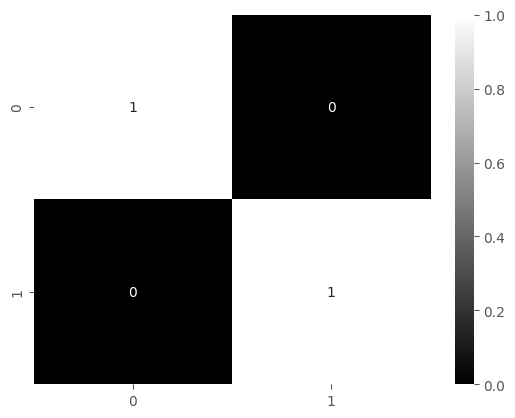

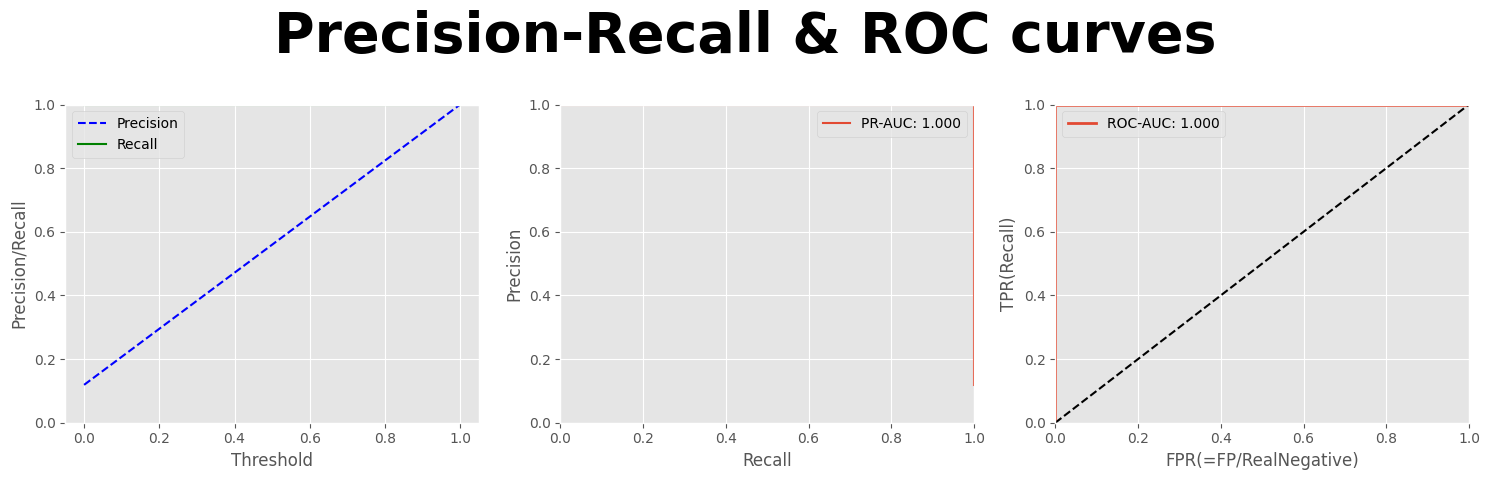

In [13]:
p_train = model.predict(X_train)
sns.heatmap(confusion_matrix(y_train, p_train, normalize='true'), cmap='gray', annot=True);
curve_analysis(y_train, p_train, figsize=(15, 5))

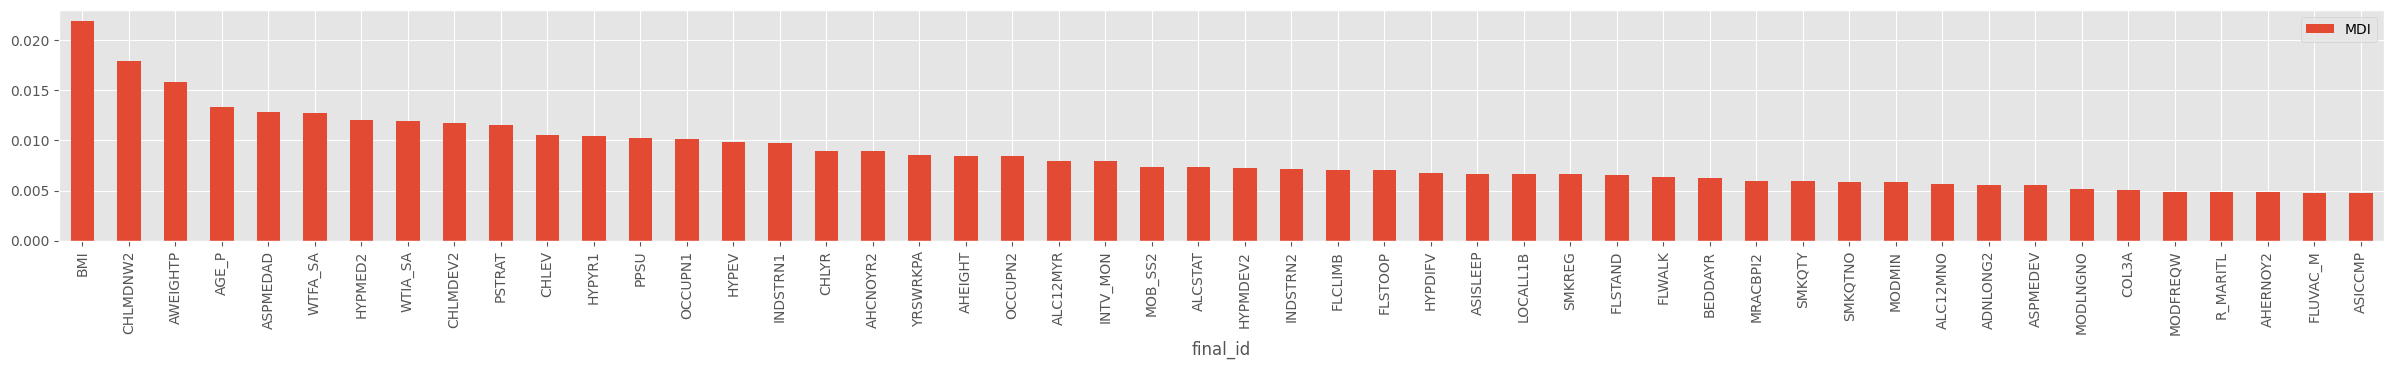

In [14]:
fi = pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['MDI']).sort_values('MDI', ascending=False)
fi.index.name = 'final_id'
fi.head(50).plot.bar(figsize=(30, 3));

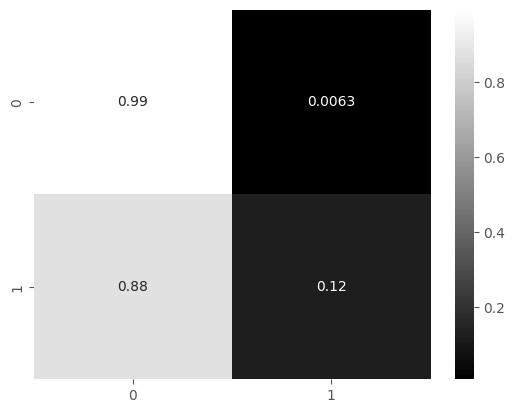

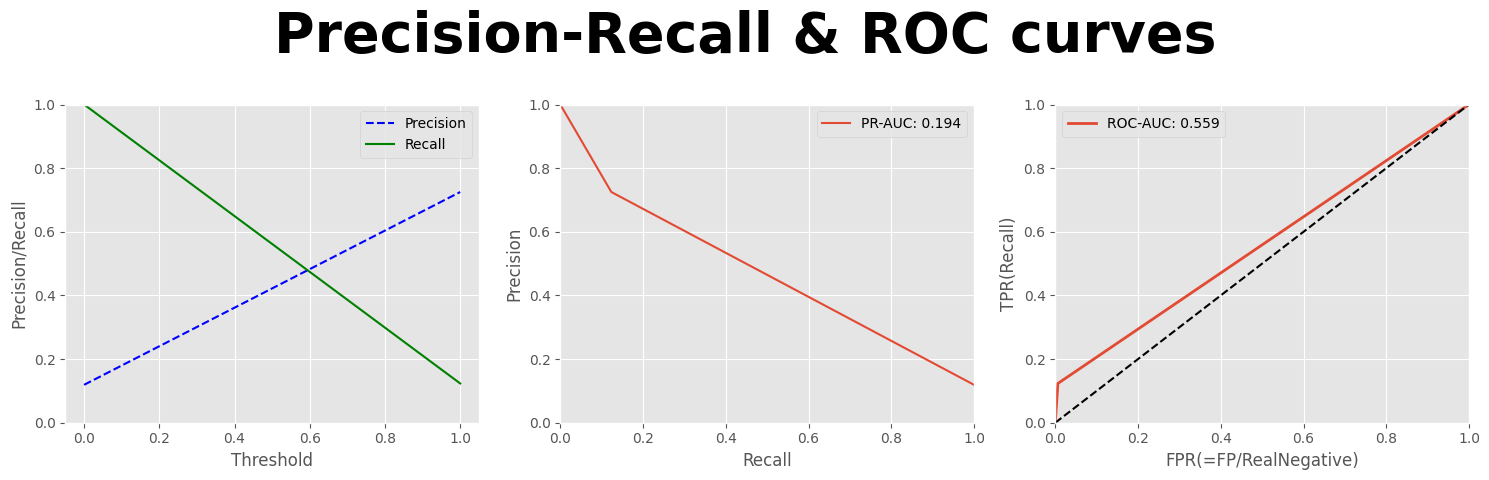

0.8899873257287706

In [17]:
p_val = model.predict(X_val)
sns.heatmap(confusion_matrix(y_val, p_val, normalize='true'), cmap='gray', annot=True);
curve_analysis(y_val, p_val, figsize=(15, 5))

model.score(X_val, y_val)

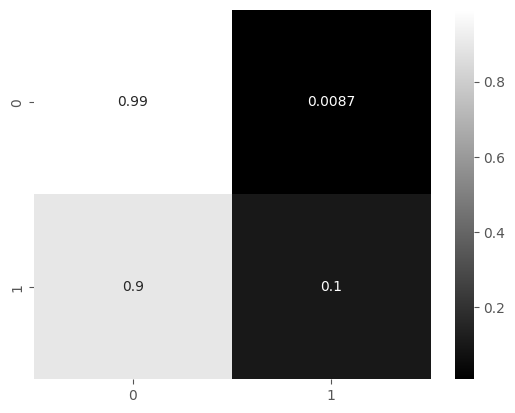

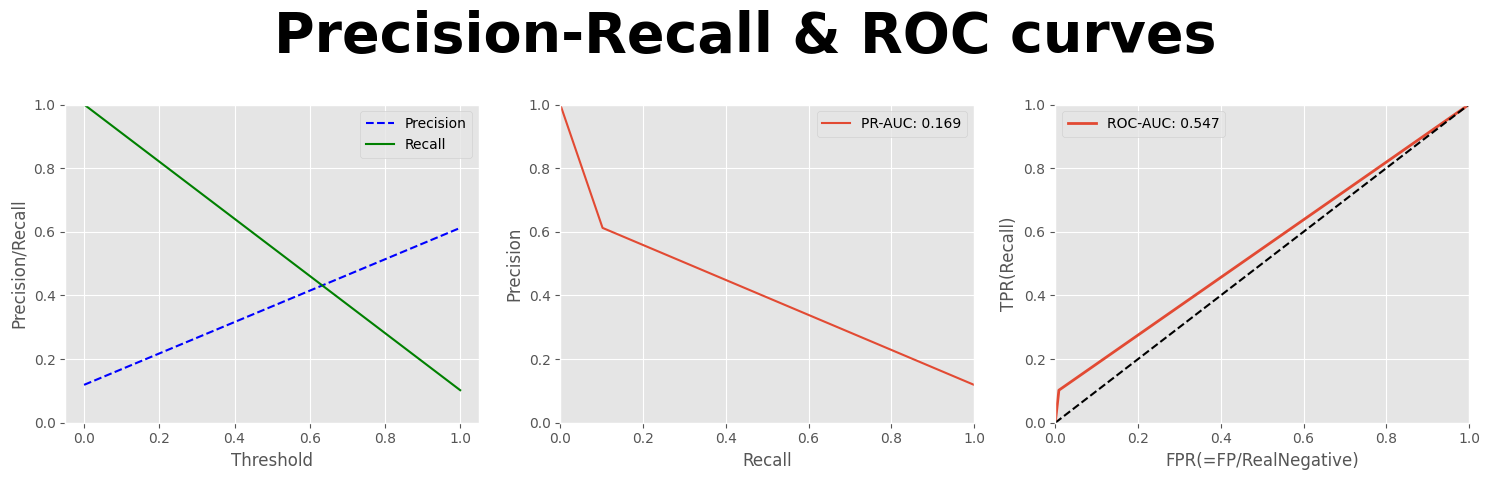

In [16]:
p_test = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, p_test, normalize='true'), cmap='gray', annot=True);
curve_analysis(y_test, p_test, figsize=(15, 5))